# 운동을 하지 않는 이유 통계
## [https://data.seoul.go.kr](https://data.seoul.go.kr)

# 0. 한글폰트 설치 후 진행

> ## 1) 한글 폰트 설치

- <font color = 'red'> 설치 후 '**런타임 다시 시작**' 누르고,
다음 셀부터 실행</font>

In [1]:
!apt-get update
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:15 http

> ## 2) 한글 폰트 사용

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='NanumBarunGothic')


# 1. Data Preprocessing
> ## 1) Colab 파일 업로드

- notExercise.xls

In [2]:
!ls -l

total 20
-rw-r--r-- 1 root root 16384 Feb 23 09:04 notExercise.xls
drwxr-xr-x 1 root root  4096 Feb 16 16:35 sample_data


> ## 2) xls 파일 읽어오기

In [3]:
import pandas as pd
df = pd.read_excel('notExercise.xls')
df.head

<bound method NDFrame.head of       기간    대분류            분류  ...  운동을 할 만한 장소가 없어서 운동을 싫어해서    기타
0   2017    서울시           서울시  ...               5.8     34.7   1.7
1   2017     성별            남자  ...               5.5     29.8   1.6
2   2017     성별            여자  ...               6.0     38.8   1.8
3   2017    연령별           10대  ...               5.6     32.2   0.3
4   2017    연령별           20대  ...               5.2     32.9   0.1
5   2017    연령별           30대  ...               4.6     31.6   0.2
6   2017    연령별           40대  ...               5.2     29.4     1
7   2017    연령별           50대  ...               7.2     32.2   1.4
8   2017    연령별        60대 이상  ...               6.9     46.8     6
9   2017    학력별         중졸 이하  ...               6.6     46.2   7.4
10  2017    학력별         고졸 이하  ...               6.9     36.5   1.7
11  2017    학력별         대졸 이하  ...               4.9     30.7   0.4
12  2017    학력별        대학원 이상  ...               0.6     29.6   0.6
13  2017    소득별   

> ## 3) '기간'열(Column) 삭제

In [4]:
df.drop(columns = '기간', inplace = True) 
df.tail()
# inplace = True : 해당 변화를 즉각적으로 해당 DataFrame에 반영

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
48,관악구,관악구,50.7,7.1,6.9,33.6,1.7
49,서초구,서초구,59.8,3.4,3.2,32.0,1.5
50,강남구,강남구,59.1,5.5,2.6,31.5,1.3
51,송파구,송파구,42.6,7.2,5.8,44.3,0.1
52,강동구,강동구,53.1,9.6,6.8,30.4,0.1


> ## 4) 23~52번(지역분류) index 삭제

- 23~52 '대분류' 정보 확인

In [5]:
df['대분류'][23:]

23    지역대분류
24    지역대분류
25    지역대분류
26    지역대분류
27    지역대분류
28      종로구
29       중구
30      용산구
31      성동구
32      광진구
33     동대문구
34      중랑구
35      성북구
36      강북구
37      도봉구
38      노원구
39      은평구
40     서대문구
41      마포구
42      양천구
43      강서구
44      구로구
45      금천구
46     영등포구
47      동작구
48      관악구
49      서초구
50      강남구
51      송파구
52      강동구
Name: 대분류, dtype: object

- 23~52 행(Row) 삭제

In [6]:
df.drop(index = range(23,53), inplace =True)
df

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


# 2. '성별' 통계
> ## 1) '성별' 데이터 추출

In [7]:
df_g = df[df['대분류'] == '성별'].copy()
df_g

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


> ## 2) '대분류'열(Column) 삭제

In [8]:
df_g.drop(columns = '대분류', inplace = True)
df_g

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,남자,55.2,7.9,5.5,29.8,1.6
2,여자,45.0,8.3,6.0,38.8,1.8


> ## 3) '분류'를 index로 지정

In [9]:
df_g.set_index('분류', inplace = True)
df_g

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
남자,55.2,7.9,5.5,29.8,1.6
여자,45.0,8.3,6.0,38.8,1.8


> ## 4) matplotlib 시각화

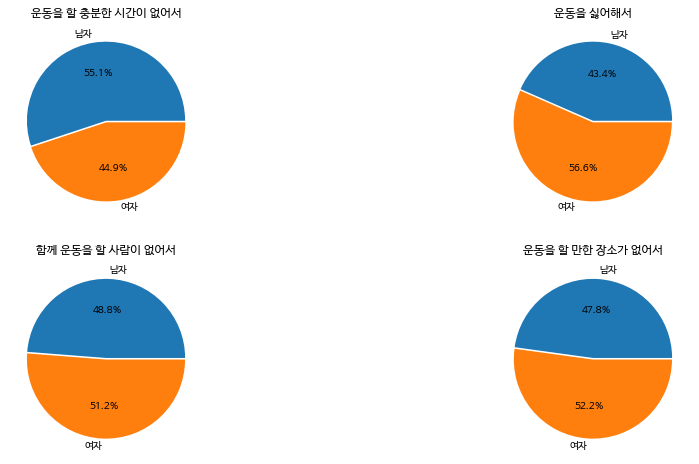

In [10]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(2, 2, figsize = (16, 8))  # 2행 2열로 만들겠다. 

# (0,0)자리에 위치
df_g['운동을 할 충분한 시간이 없어서'].plot.pie(explode = [0, 0.02],
                                   ax = ax[0][0],   # (0,0)자리에 위치
                                   autopct = '%1.1f%%')
ax[0][0].set_title('운동을 할 충분한 시간이 없어서')  
ax[0][0].set_ylabel('')

# (1,0)자리에 위치
df_g['함께 운동을 할 사람이 없어서'].plot.pie(explode = [0, 0.02],
                                   ax = ax[1][0],   
                                   autopct = '%1.1f%%')
ax[1][0].set_title('함께 운동을 할 사람이 없어서')
ax[1][0].set_ylabel('')

# (0,1)자리에 위치
df_g['운동을 싫어해서'].plot.pie(explode = [0, 0.02],
                                   ax = ax[0][1],
                                   autopct = '%1.1f%%')
ax[0][1].set_title('운동을 싫어해서')
ax[0][1].set_ylabel('')

# (1,1)자리에 위치
df_g['운동을 할 만한 장소가 없어서'].plot.pie(explode = [0, 0.02],
                                   ax = ax[1][1],
                                   autopct = '%1.1f%%')
ax[1][1].set_title('운동을 할 만한 장소가 없어서')
ax[1][1].set_ylabel('')

plt.show()


# 3. '연령별'통계
> ## 1) '연령별' 데이터 추출

In [13]:
df_a = df[df['대분류'] == '연령별'].copy()
df_a.drop(columns = '대분류', inplace = True)
df_a.set_index('분류', inplace = True)
df_a

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
10대,55.7,6.1,5.6,32.2,0.3
20대,54.8,6.9,5.2,32.9,0.1
30대,58.1,5.5,4.6,31.6,0.2
40대,57.7,6.8,5.2,29.4,1
50대,50.1,9.2,7.2,32.2,1.4
60대 이상,27.5,12.8,6.9,46.8,6


> ## 2) matplotlib 시각화

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

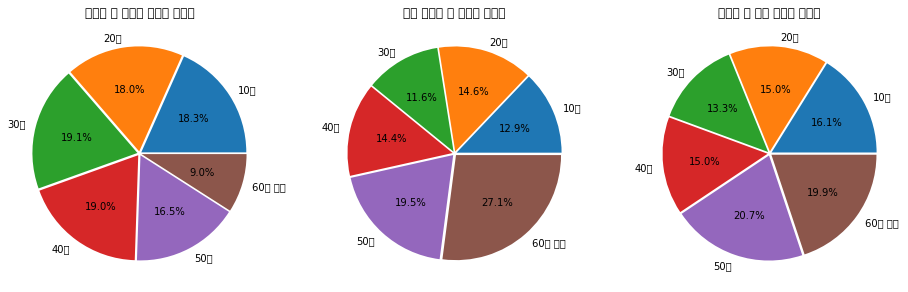

In [14]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(1, 3, figsize = (16, 8)) # 1행 3열로 만들겠다
explode_set = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

# 1열(index = 0) 자리에 위치
df_a['운동을 할 충분한 시간이 없어서'].plot.pie(explode = explode_set,
                                   ax = ax[0],
                                   autopct = '%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

# 2열(index = 1) 자리에 위치
df_a['함께 운동을 할 사람이 없어서'].plot.pie(explode = explode_set,
                                   ax = ax[1],
                                   autopct = '%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')

# 3열(index = 2) 자리에 위치
df_a['운동을 할 만한 장소가 없어서'].plot.pie(explode = explode_set,
                                   ax = ax[2],
                                   autopct = '%1.1f%%')
ax[2].set_title('운동을 할 만한 장소가 없어서')
ax[2].set_ylabel('')

plt.show()

# 4.'학력별' 통계

> ## 1) '학력별' 데이터 추출

In [15]:
df_v = df[df['대분류'] == '학력별'].copy()
df_v.drop(columns = '대분류', inplace = True)
df_v.set_index('분류', inplace = True)
df_v

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
중졸 이하,26.1,13.7,6.6,46.2,7.4
고졸 이하,46.3,8.5,6.9,36.5,1.7
대졸 이하,57.4,6.6,4.9,30.7,0.4
대학원 이상,65.3,3.8,0.6,29.6,0.6


> ## 2) matplotlib 시각화

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

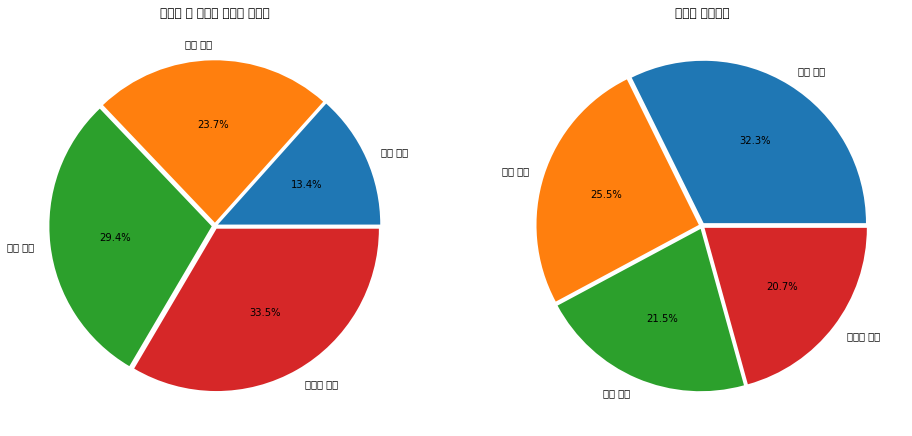

In [16]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(1, 2, figsize = (16, 8))  # 1행 2열로 만들겠다
explode_set = [0.02, 0.02, 0.02, 0.02]

# 1열(index = 0) 자리에 위치
df_v['운동을 할 충분한 시간이 없어서'].plot.pie(explode = explode_set,
                                   ax = ax[0],
                                   autopct = '%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

# 2열(index = 1) 자리에 위치
df_v['운동을 싫어해서'].plot.pie(explode = explode_set,
                                   ax = ax[1],
                                   autopct = '%1.1f%%')
ax[1].set_title('운동을 싫어해서')
ax[1].set_ylabel('')

plt.show()

###
# The End
###